# I. NetworkX et convergence de suite

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib networkx

In [1]:
%matplotlib inline

from pprint import pprint
import random
import numpy as np
from itertools import permutations, combinations

import matplotlib.pyplot as plt
import networkx as nx

### 1) Ecrire une fonction pour génerer un graphe networkX avec x noeuds et y liens aléatoires. Précisez une valeur aléatoire entre 0 et 1 pour chaque noeuds. Cette valeur sera symbolisée comme étant le score par défault du noeud.

In [18]:
NODES = 2000
EDGES = 5000

In [19]:
def generate_graph(n_nodes, n_edges):
    # generate nodes dict
    nodes = dict([(str(node+1), np.around(random.random(), 3)) for node in list(range(n_nodes))])
    # generate edges dict with random edges
    edges = {}
    while len(edges) < n_edges:
        pair = [x for x in random.choices([*nodes.keys()], k=2)]
        edges['-'.join(pair)] = nodes[pair[0]]
    # convert dicts to directed networkx graph
    G = nx.DiGraph()
    for couple, proba_to_win in edges.items():
        a, b = couple.split('-')
        G.add_edge(a, b, weight=edges[a + '-' + b])
    return G

G = generate_graph(n_nodes=NODES, n_edges=EDGES)
print(G)

DiGraph with 1984 nodes and 5000 edges


### 2) Afficher ce graph

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


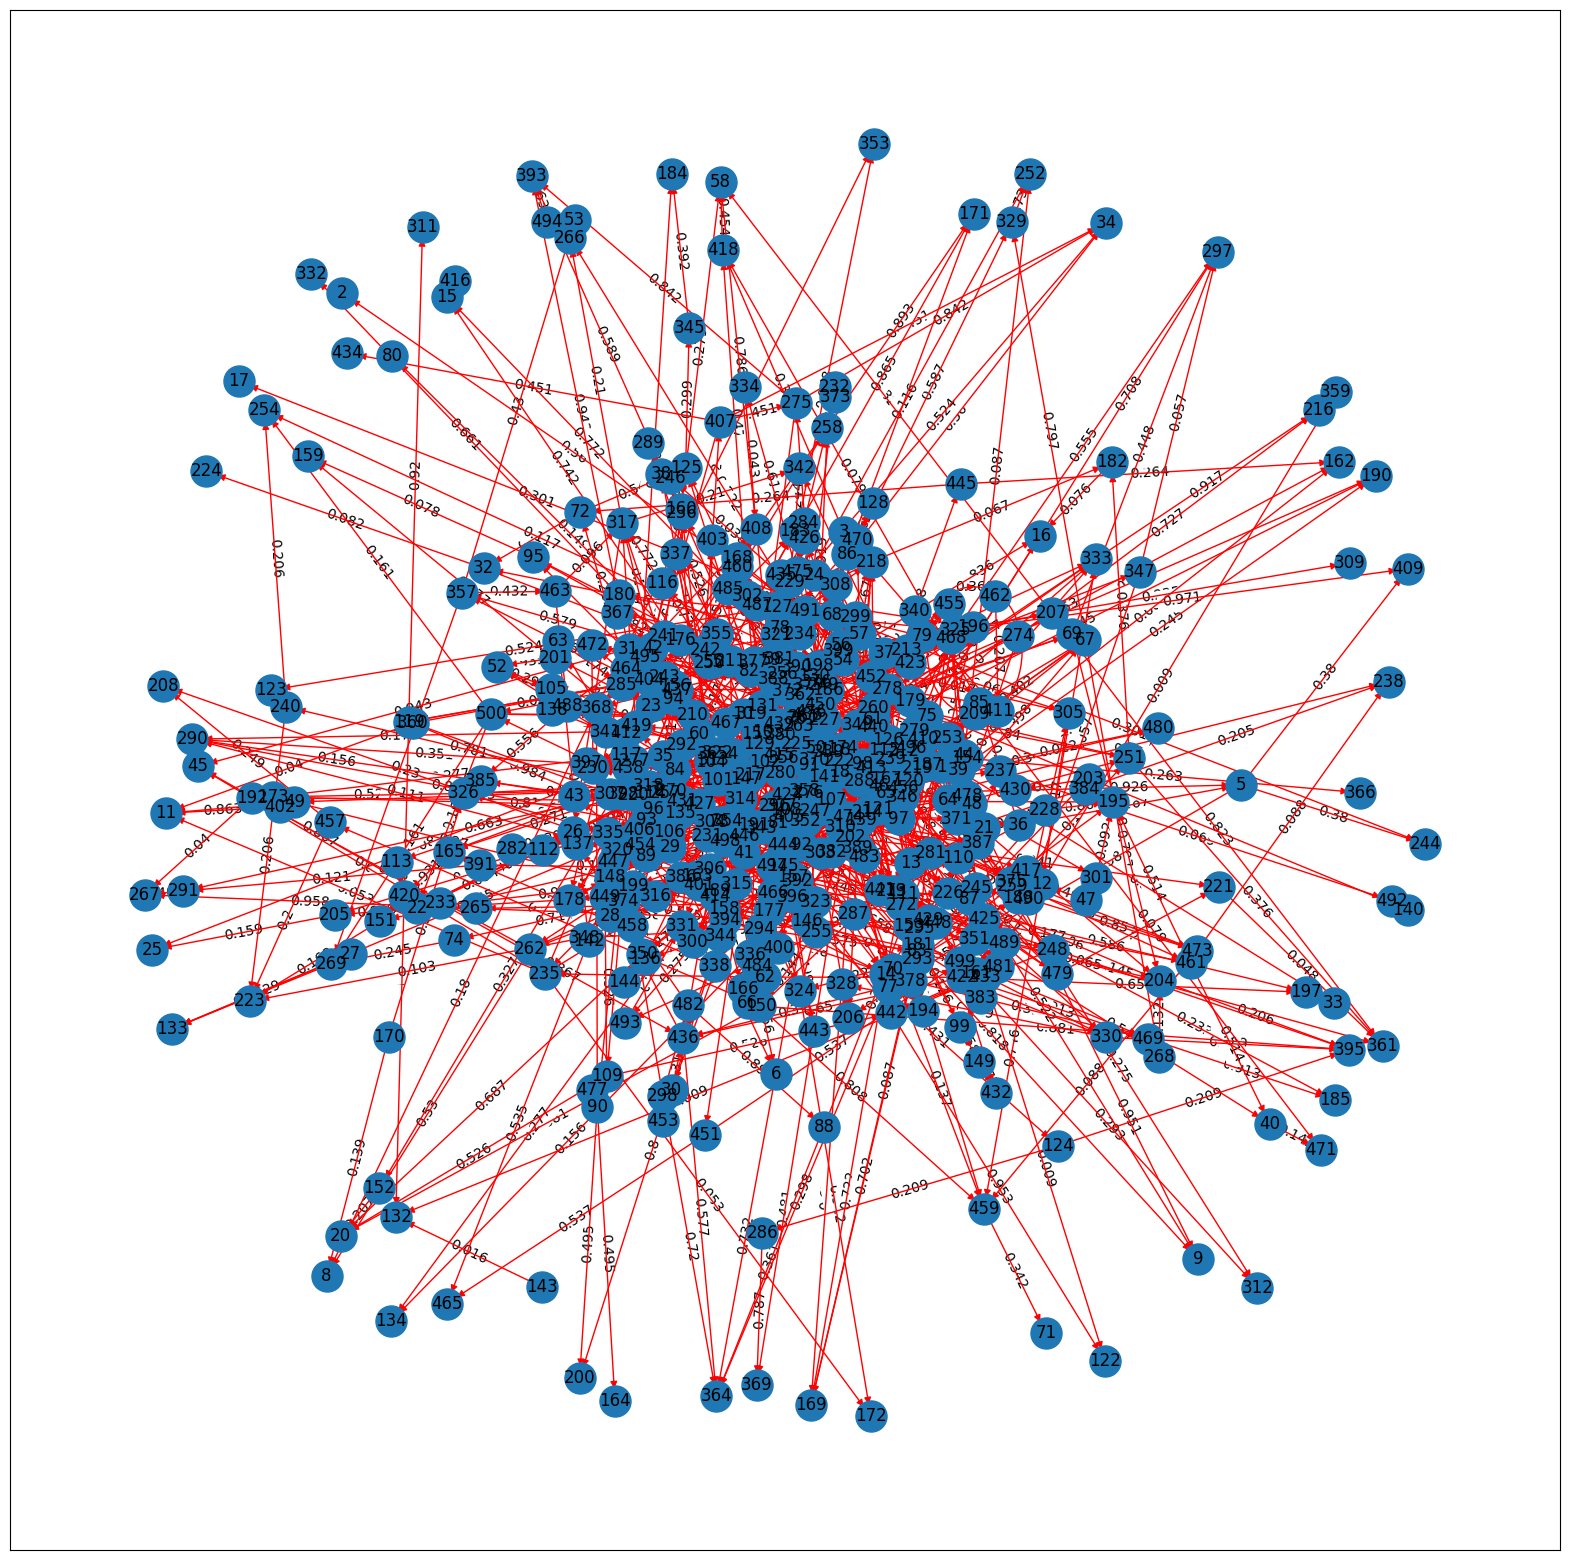

In [6]:
def plot_graph(G, node_size=500, display_edge_labels=False):
    fig = plt.figure(figsize=(20, 20))
    edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = node_size)
    nx.draw_networkx_labels(G, pos)
    if display_edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
    plt.show()

plot_graph(G, display_edge_labels=True)

### 3) ecrite une fonction pour calculer un score pour chaque noeud comme la moyenne des valeurs de ses noeuds entrants

In [8]:
def compute_score(G, scores):
    for node in G.nodes():
        score_node = scores[node]
        nb_edges_in = len(G.in_edges(node))
        if nb_edges_in > 0:
            new_score = 0
            for edge in G.in_edges(node):
                a = edge[0]
                new_score += scores[a]
            new_score /= float(nb_edges_in)
            scores[node] = new_score
    return scores

### 4) le calcul du score d'un noeuds dépend donc de ses voisins. C'est donc x calcul de scores de noeuds qui correspondent à x suites à faire converger. Faites converger ces scores en précisant une condition d'arrêt (en calculant la différence L1 avec l'état précédent) ainsi qu'un nombre d'itération maximum à ne pas dépasser.

In [22]:
n_it = 15
eps = 0 # on peut mettre ici 0 car les suites atteignent leurs limites. Autrement il est d'usage de mettre une faible valeur (ex: 1e-10)
N = G.number_of_nodes()

diffs = []
scores = {n: random.random() for n in G.nodes()}
for it in range(n_it):
    prev_scores = scores.copy()
    # recompute scores
    scores = compute_score(G, scores)
    # check convergence
    diff = sum([abs(scores[node] - prev_scores[node]) for node in G.nodes])
    diffs.append(diff)
    print(it, ":", diff)
    if diff <= N*eps:
        print('Iteration converged in %d iterations.' % it)
        break

print(sum(scores.values()))

0 : 504.93389927665464
1 : 216.5750013489617
2 : 97.62519813862117
3 : 40.5172703630523
4 : 17.937994869513084
5 : 8.216122896264233
6 : 3.932845674719783
7 : 1.7637084237297784
8 : 0.8047179049917147
9 : 0.3779045232621952
10 : 0.1913003732347926
11 : 0.11492789969161935
12 : 0.08252015532970211
13 : 0.06338696239120142
14 : 0.050989599558038695
947.0784710261672


### 5) reprener les différences entre chaque itérations et afficher les sur un graph, en x les itérations, en y la différence.

<Axes: >

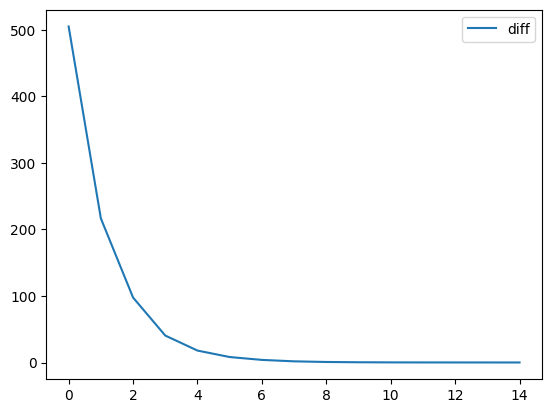

In [23]:
import pandas as pd
pd.DataFrame(diffs, columns=['diff']).plot()